# **3.3.1.2.2 DATASET READING**

In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

#Convert the labels into one-hot codes 
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


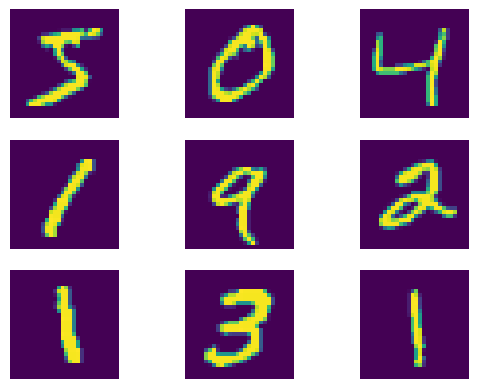

In [2]:
plt.figure()
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(x_train_raw[i])
#plt.ylabel(y[i].numpy())
   plt.axis('off')

plt.show()

In [3]:
#Convert a 28 x 28 image into a 784 x 1 vector.
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [4]:
#Normalize image pixel values.
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = keras.Sequential([
   layers.Dense(512, activation='relu', input_dim = 784),
   layers.Dense(256, activation='relu'),
   layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [6]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Optimizer,
              metrics=['accuracy'])

In [7]:
#Fit the training data to the model by using the fit method.
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1)

Epoch 1/10
469/469 [==============================] - 5s 7ms/step - loss: 0.2228 - accuracy: 0.9343
Epoch 2/10
469/469 [==============================] - 9s 18ms/step - loss: 0.0833 - accuracy: 0.9741
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0559 - accuracy: 0.9825
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.0401 - accuracy: 0.9867
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0270 - accuracy: 0.9910
Epoch 7/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 8/10
469/469 [==============================] - 12s 26ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 9/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 10/10
469/469 [==============================] - 14s 29ms/step - loss: 0.0157 - a

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07099048048257828
Test accuracy: 0.9829999804496765


In [9]:
model.save('./model/final_DNN_model.h5')

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
model=keras.Sequential() #Create a network sequence.

##Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation =
tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))

##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))

In [11]:
#Expand data dimensions to adapt to the CNN model.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 39s 60ms/step - loss: 0.2865 - accuracy: 0.9098
Epoch 2/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0902 - accuracy: 0.9730
Epoch 3/5
469/469 [==============================] - 28s 61ms/step - loss: 0.0691 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0560 - accuracy: 0.9830
Epoch 5/5
469/469 [==============================] - 26s 56ms/step - loss: 0.0482 - accuracy: 0.9856


In [12]:
test_loss,test_acc=model.evaluate(x=X_test,y=y_test)
print("Test Accuracy %.2f"%test_acc)

313/313 [==============================] - 11s 29ms/step - loss: 0.0259 - accuracy: 0.9911
Test Accuracy 0.99


In [13]:
model.save('./model/final_CNN_model.h5')

In [14]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/final_CNN_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

1/1 [==============================] - 1s 623ms/step
prediction results of the first 20 images:
[2.0678359e-12 2.1681199e-08 4.4811094e-10 1.2237774e-07 8.9524742e-12
 6.0245503e-11 3.9641078e-15 9.9999964e-01 7.1504018e-11 1.9025643e-07],[2.7710010e-07 3.1147583e-06 9.9999666e-01 3.7175954e-10 5.5162774e-11
 2.1946284e-12 5.4958149e-09 4.1441996e-11 1.3644939e-08 1.3931560e-12],[2.5776975e-08 9.9999547e-01 1.9175561e-08 5.2979184e-11 1.1659063e-06
 7.0783429e-08 1.9776846e-06 2.1526624e-08 1.2806124e-06 2.3400326e-09],[9.9999464e-01 2.2945734e-09 5.2247038e-09 7.3732916e-11 4.0707401e-10
 1.7184806e-09 5.2445707e-06 5.2152085e-08 4.1715737e-08 1.1093896e-07],[6.1573180e-10 5.9983161e-09 9.8366031e-11 1.1853207e-12 9.9999464e-01
 1.4127258e-10 4.8042548e-08 1.4175743e-09 1.4101637e-09 5.3483677e-06],	
[4.03369471e-09 9.99999642e-01 1.49725854e-09 6.86249993e-13
 1.64762398e-07 5.95397953e-10 3.28868630e-08 1.20328583e-08
 1.09466484e-07 2.43881970e-10],[4.91671370e-09 6.80859102e-06 3.

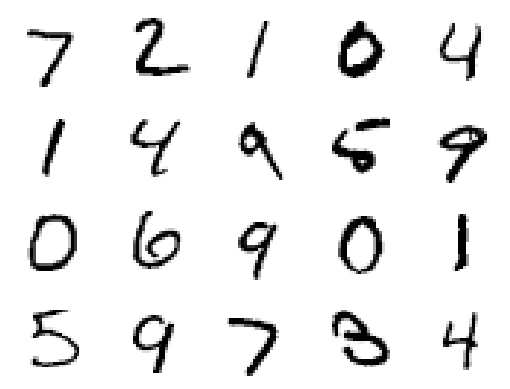

In [15]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline

def res_Visual(n):
   final_opt_a=new_model.predict(X_test[0:n])    #Perform predictions on the test set by usingthe model.
   classes_x=np.argmax(final_opt_a, axis=1)
   fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
   ax = ax.flatten()
   print('prediction results of the first {} images:'.format(n))
   for i in range(n):
         print(final_opt_a[i],end=',')
         if int((i+1)%5) ==0:
            print('\t')
#Visualize image display
         img = X_test[i].reshape((28,28))    #Read each row of data in the format of Ndarry.
         plt.axis("off")
         ax[i].imshow(img, cmap='Greys', interpolation='nearest')    #Visualization
         ax[i].axis("off")
   print('first {} images in the test set:'.format(n))
res_Visual(20)